# BANK LOAN ELIGIBILTY PREDICTION:


In [ ]:


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    auc,
    roc_curve
)

import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import cm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the dataset
df = pd.read_csv("/content/drive/MyDrive/AECML-PROJ/credit_train.csv")
dtest = pd.read_csv("/content/drive/MyDrive/AECML-PROJ/credit_test.csv")
pd.isnull(df).any()
df.dataframeName = "credit.csv"
print(df.shape)

(100514, 19)


In [ ]:
df.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
#making copies of the dataset
trainin= df.copy()
test = dtest.copy()
#removing unwanted features
trainin = trainin.drop(['Loan ID', 'Customer ID' ], axis =  1)
test = test.drop(['Loan ID', 'Customer ID' ], axis =  1)
print(trainin.columns)
print(test.columns)

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')
Index(['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income',
       'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')


In [ ]:
print(trainin['Loan Status'].shape)
trainin.dtypes

(100514,)


Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [ ]:
print(set(trainin['Loan Status']))

{nan, 'Fully Paid', 'Charged Off'}


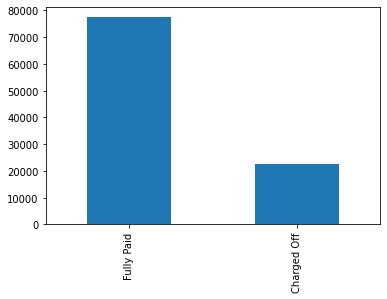

In [ ]:
trainin['Loan Status'].value_counts(normalize = True)
trainin['Loan Status'].value_counts().plot.bar()

In [ ]:
trainin['Years in current job'].value_counts(normalize = True)

10+ years    0.324928
2 years      0.095366
3 years      0.085291
< 1 year     0.085239
5 years      0.070862
1 year       0.067448
4 years      0.064138
6 years      0.059366
7 years      0.058228
8 years      0.047840
9 years      0.041293
Name: Years in current job, dtype: float64

In [ ]:


trainin['Years in current job']=trainin['Years in current job'].map({'8 years':8, '10+ years':10, '3 years':3, '5 years':5, '< 1 year':0,
                                    '2 years':2, '4 years':4, '9 years':9, '7 years':7, '1 year':1, '6 years':6})

test['Years in current job']=test['Years in current job'].map({'8 years':8, '10+ years':10, '3 years':3, '5 years':5, '< 1 year':0,
       '2 years':2, '4 years':4, '9 years':9, '7 years':7, '1 year':1, '6 years':6})

trainin['Loan Status'] = trainin['Loan Status'].map({'Fully Paid':1 , 'Charged Off':0})

trainin['Years in current job'].value_counts(normalize = True)




10.0    0.324928
2.0     0.095366
3.0     0.085291
0.0     0.085239
5.0     0.070862
1.0     0.067448
4.0     0.064138
6.0     0.059366
7.0     0.058228
8.0     0.047840
9.0     0.041293
Name: Years in current job, dtype: float64

In [ ]:
trainin['Number of Credit Problems'].value_counts(normalize=True)

0.0     0.86035
1.0     0.12077
2.0     0.01299
3.0     0.00378
4.0     0.00125
5.0     0.00049
6.0     0.00017
7.0     0.00008
8.0     0.00004
9.0     0.00002
11.0    0.00002
10.0    0.00002
15.0    0.00001
12.0    0.00001
Name: Number of Credit Problems, dtype: float64

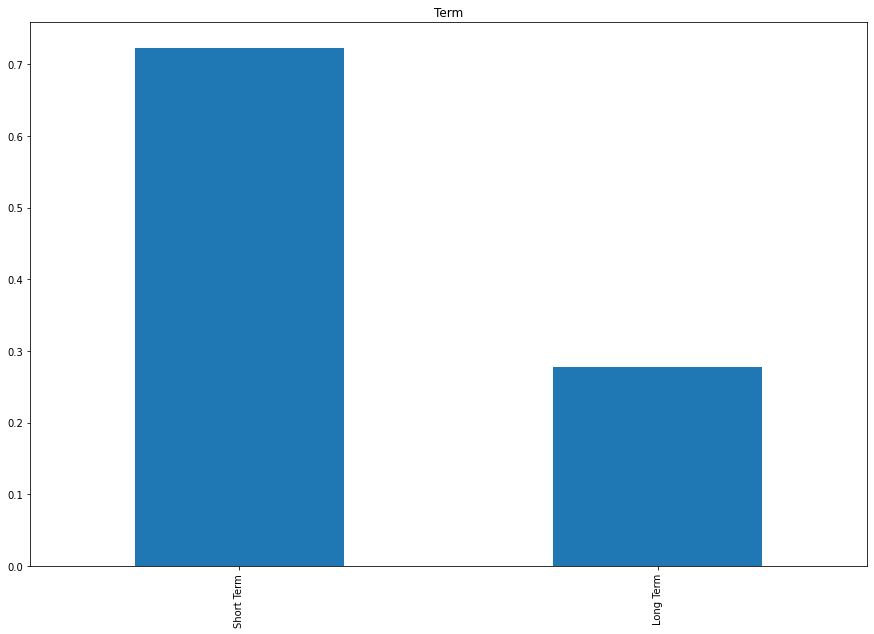

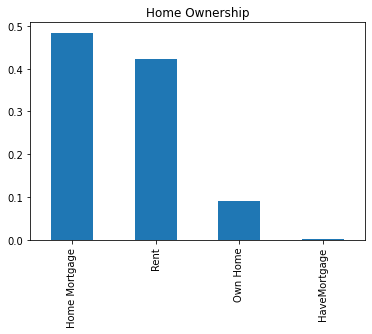

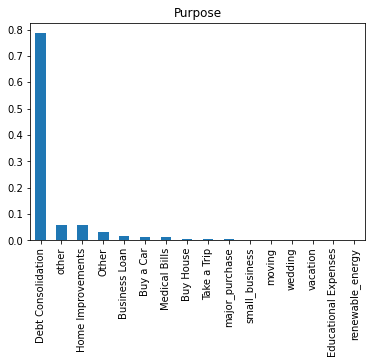

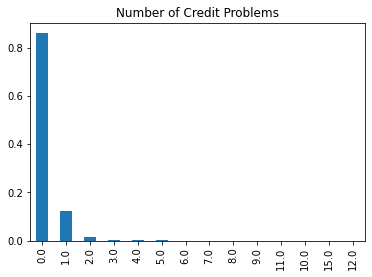

In [ ]:
# Around 72% want short term Duration for the Loan
trainin['Term'].value_counts(normalize=True).plot.bar(figsize=(15,10), title='Term')
plt.show()
# Around 48% people having Home Mortage
# Around 42% people are in Rent
# Around 9% people having their Own Home
# Around 0.2% people having HaveMortgage  
trainin['Home Ownership'].value_counts(normalize=True).plot.bar(title='Home Ownership')
plt.show()
# Maximum Purpose for the loan of the people is Debt Consolidation nearly around 78% 
trainin['Purpose'].value_counts(normalize=True).plot.bar(title='Purpose')
plt.show()
# Around 86 % people having 0 Credit Problems 
trainin['Number of Credit Problems'].value_counts(normalize=True).plot.bar(title='Number of Credit Problems')
plt.show()

In [ ]:
trainin['Credit Score'].describe()


# removing outliers
trainin=trainin.drop(trainin[trainin['Credit Score']>900].index)
test = test.drop(test[test['Credit Score']>900].index)
trainin['Credit Score'].describe()


count    76295.000000
mean       716.615230
std         28.117302
min        585.000000
25%        704.000000
50%        722.000000
75%        739.000000
max        751.000000
Name: Credit Score, dtype: float64

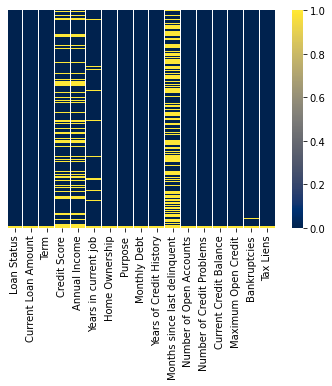

In [ ]:
sns.heatmap(trainin.isnull(), yticklabels=False, cbar=True, cmap='cividis')

In [ ]:
#Dealing with null values:
# dropping the samples whose target (loan status) having missing values
trainin=trainin.drop(trainin['Loan Status'][trainin['Loan Status'].isna()].index)
trainin['Credit Score'].fillna(0, inplace = True)
trainin['Annual Income'].fillna(0,inplace=True)
trainin['Years of Credit History'].fillna(0, inplace = True)
trainin['Monthly Debt'].fillna(0, inplace = True)
trainin['Number of Open Accounts'].fillna(0, inplace = True)
trainin['Number of Credit Problems'].fillna(0,inplace=True)
trainin['Current Credit Balance'].fillna(0, inplace = True)
trainin['Maximum Open Credit'].fillna(0, inplace = True)
trainin['Bankruptcies'].fillna(0,inplace=True)
trainin['Tax Liens'].fillna(0,inplace=True)
trainin['Years in current job'].fillna(0,inplace=True)
trainin['Months since last delinquent'].fillna(0,inplace=True)


test['Credit Score'].fillna(0, inplace = True)
test['Annual Income'].fillna(0,inplace=True)
test['Years of Credit History'].fillna(0, inplace = True)
test['Monthly Debt'].fillna(0, inplace = True)
test['Number of Open Accounts'].fillna(0, inplace = True)
test['Number of Credit Problems'].fillna(0,inplace=True)
test['Current Credit Balance'].fillna(0, inplace = True)
test['Maximum Open Credit'].fillna(0, inplace = True)
test['Bankruptcies'].fillna(0,inplace=True)
test['Tax Liens'].fillna(0,inplace=True)
test['Years in current job'].fillna(0,inplace=True)
test['Months since last delinquent'].fillna(0,inplace=True)
trainin.head()
print(pd.isnull(trainin).any())
print()
test.dtypes

Loan Status                     False
Current Loan Amount             False
Term                            False
Credit Score                    False
Annual Income                   False
Years in current job            False
Home Ownership                  False
Purpose                         False
Monthly Debt                    False
Years of Credit History         False
Months since last delinquent    False
Number of Open Accounts         False
Number of Credit Problems       False
Current Credit Balance          False
Maximum Open Credit             False
Bankruptcies                    False
Tax Liens                       False
dtype: bool



Current Loan Amount               int64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job            float64
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent     object
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit               int64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

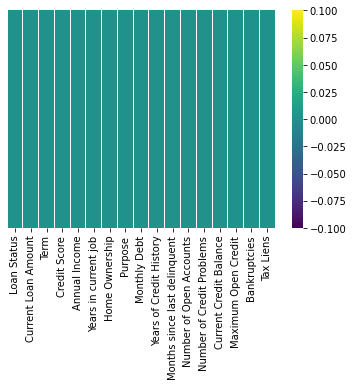

In [ ]:
# After dealing with null values
sns.heatmap(trainin.isnull(), yticklabels=False, cbar=True, cmap='viridis')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


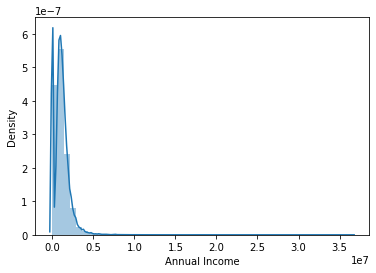

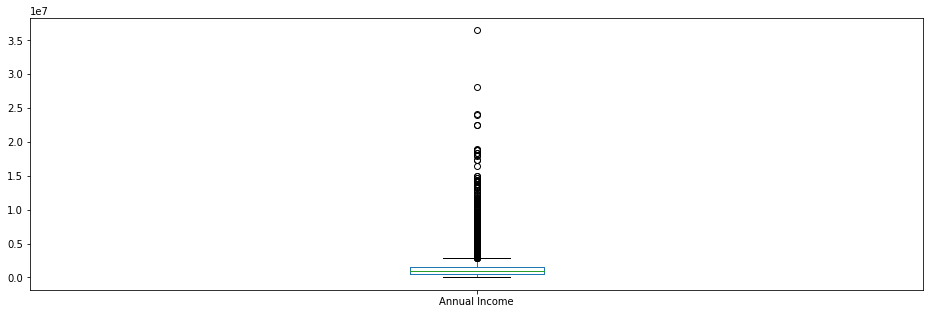

In [ ]:
sns.distplot(trainin['Annual Income'])
plt.show()
trainin['Annual Income'].plot.box(figsize=(16,5))
plt.show()


It can be inferred that most of the data in the distribution of applicant income are towards the left which means it is not normally distributed. We will try to make it normal in later sections as algorithms work better if the data is normally distributed.
The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

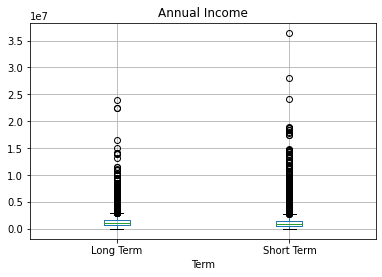

In [ ]:
trainin.boxplot(column='Annual Income', by = 'Term') 
plt.suptitle("")

We can see that there are a higher number of Short Term Loan with very high incomes, which are appearing to be outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


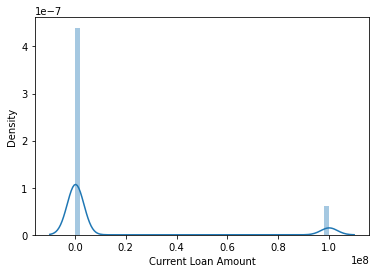

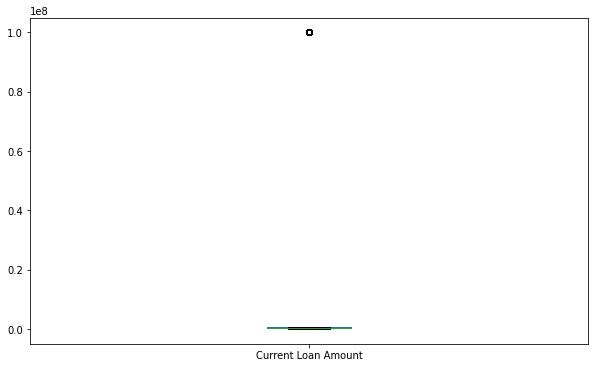

In [ ]:
trainin.notna()
sns.distplot(trainin['Current Loan Amount'])
plt.show()
trainin['Current Loan Amount'].plot.box(figsize=(10,6))
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

#### Bivariate Analysis
Let’s recall some of the hypotheses that we generated earlier

Applicants with high incomes should have more chances of loan approval.

Applicants who have repaid their previous debts should have higher chances of loan approval.

Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.

Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.

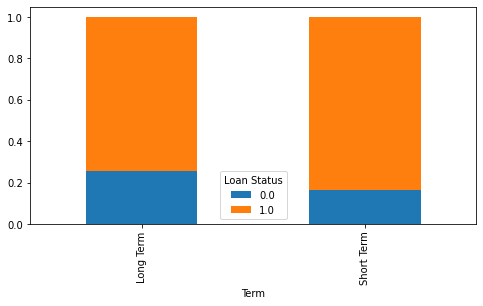

In [ ]:
term=pd.crosstab(trainin['Term'],trainin['Loan Status'])
term.div(term.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(8,4))
plt.show()

In [ ]:
trainin.dtypes

Loan Status                     float64
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job            float64
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

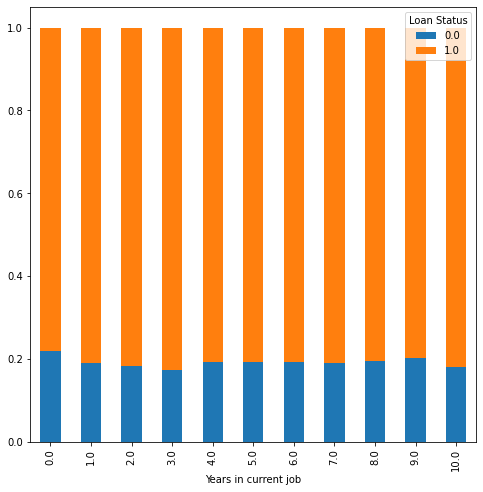

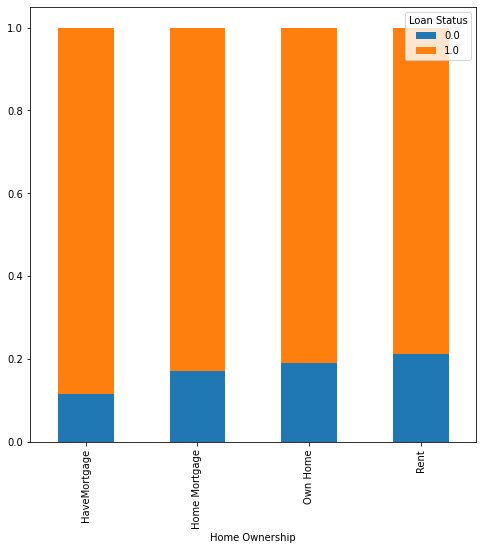

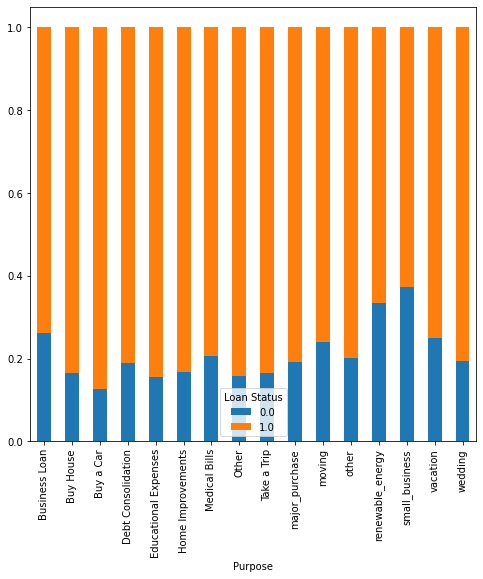

In [ ]:
Years=pd.crosstab(trainin['Years in current job'],trainin['Loan Status'])
Home_Ownership =pd.crosstab(trainin['Home Ownership'],trainin['Loan Status'])
Purpose=pd.crosstab(trainin['Purpose'],trainin['Loan Status'])
Years.div(Years.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(8,8))
plt.show()
Home_Ownership.div(Home_Ownership.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(8,8))
plt.show()
Purpose.div(Purpose.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(8,8))
plt.show()


1) 3 Years of current job having more Fully paid then others.. 

2) Person belongs to Home Mortages giving full Paid in less duration then others

3) Small Business people having struggle and delay to pay the Full Amount of Loan that's why charged is also increasing Continously..

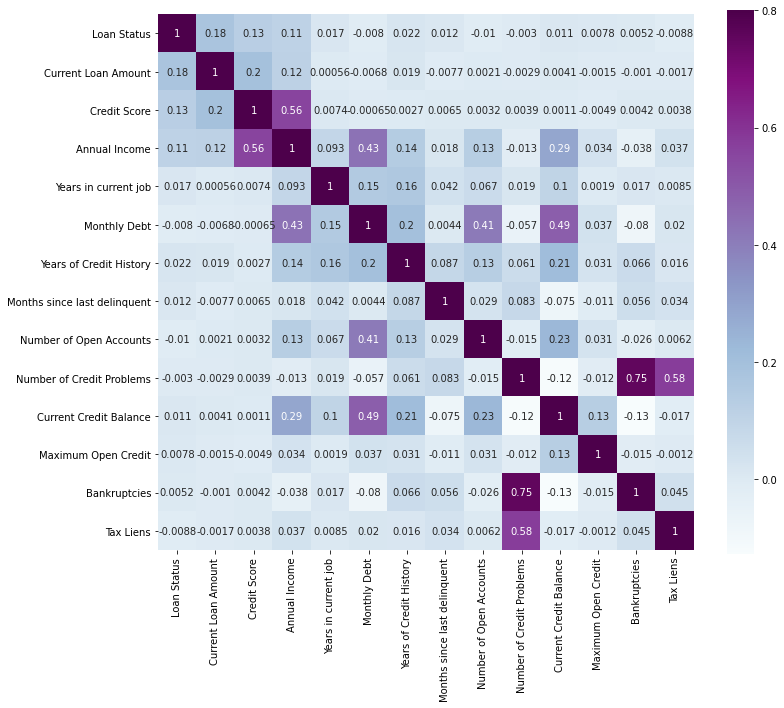

In [ ]:
matrix = trainin.corr()
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

We see that the most correlate variables are (Annual Income and Monthly Debt) 

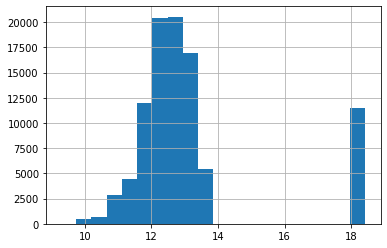

In [ ]:
trainin['Current_Loan_Amount']=np.log(trainin['Current Loan Amount'])
trainin['Current_Loan_Amount'].hist(bins=20)
test['Current_Loan_Amount']=np.log(test['Current Loan Amount'])

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset

In [ ]:
trainin['Credit Score'].value_counts(normalize=True)

0.0      0.200673
747.0    0.019120
740.0    0.018292
746.0    0.018251
741.0    0.018146
           ...   
590.0    0.000084
593.0    0.000073
586.0    0.000073
589.0    0.000063
592.0    0.000042
Name: Credit Score, Length: 168, dtype: float64

In [ ]:
training = trainin
training= training.drop(['Term', 'Purpose' , 'Months since last delinquent','Home Ownership'] , axis = 1)
test = test.drop(['Term','Purpose','Months since last delinquent','Home Ownership'], axis =1)
features = training.iloc[:,1:]
target = training['Loan Status']
test.head()


,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Current_Loan_Amount
0,611314,747.0,2074116.0,10.0,42000.83,21.8,9,0,621908,1058970,0.0,0.0,13.323366
1,266662,734.0,1919190.0,10.0,36624.40,19.4,11,0,679573,904442,0.0,0.0,12.493737
2,153494,709.0,871112.0,2.0,8391.73,12.5,10,0,38532,388036,0.0,0.0,11.941417
3,176242,727.0,780083.0,10.0,16771.87,16.5,16,1,156940,531322,1.0,0.0,12.079613
4,321992,744.0,1761148.0,10.0,39478.77,26.0,14,0,359765,468072,0.0,0.0,12.682282


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(features, target , shuffle = False)
scale=StandardScaler()
features=scale.fit_transform(features)

kf= KFold(n_splits=10, shuffle=False)
print(x_train.shape)
print(x_test.shape)


(71586, 13)
(23863, 13)


## LogisticRegression

Test Accuracy Score 0.8111641941161679
[0.80911472 0.81341016 0.81299109 0.80586695 0.81026716 0.80921949
 0.81875327 0.80806705 0.80796228 0.8082565 ]
81.11641941161679
Precision= 0.8084321696492184
Recall= 0.9998963300850093
F1_Score= 0.8940282251523648
AUC = 0.49994816504250467


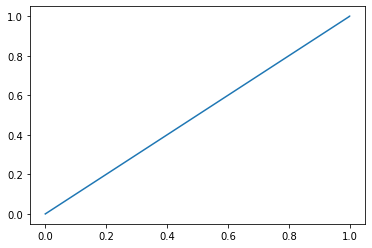

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
score = logreg.score(x_train, y_train)
print("Test Accuracy Score", score)
predict = logreg.predict(x_test)
cv_score = cross_val_score(logreg , features , target , scoring = 'accuracy' , cv = kf)
print(cv_score)
print(np.mean(score)*100)
fpr, tpr, thresholds = roc_curve(y_test, predict)
print("Precision=", precision_score(y_test, predict))
print("Recall=", recall_score(y_test, predict))
print("F1_Score=", f1_score(y_test, predict))
print('AUC =',auc(fpr, tpr))
plt.plot(fpr, tpr)


###KNN

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier(metric = 'minkowski', p = 2)
pipe = Pipeline([('standadizer', scale), ('knn', k)])
search_space = [{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20]}]
kval = GridSearchCV(pipe, search_space, cv=5, verbose=4).fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] knn__n_neighbors=1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. knn__n_neighbors=1, score=0.734, total=   6.6s
[CV] knn__n_neighbors=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s


[CV] .................. knn__n_neighbors=1, score=0.727, total=   6.5s
[CV] knn__n_neighbors=1 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.1s remaining:    0.0s


[CV] .................. knn__n_neighbors=1, score=0.733, total=   5.7s
[CV] knn__n_neighbors=1 ..............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.8s remaining:    0.0s


[CV] .................. knn__n_neighbors=1, score=0.734, total=   6.2s
[CV] knn__n_neighbors=1 ..............................................
[CV] .................. knn__n_neighbors=1, score=0.730, total=   6.1s
[CV] knn__n_neighbors=2 ..............................................
[CV] .................. knn__n_neighbors=2, score=0.648, total=   6.9s
[CV] knn__n_neighbors=2 ..............................................
[CV] .................. knn__n_neighbors=2, score=0.645, total=   7.0s
[CV] knn__n_neighbors=2 ..............................................
[CV] .................. knn__n_neighbors=2, score=0.650, total=   6.6s
[CV] knn__n_neighbors=2 ..............................................
[CV] .................. knn__n_neighbors=2, score=0.652, total=   7.6s
[CV] knn__n_neighbors=2 ..............................................
[CV] .................. knn__n_neighbors=2, score=0.645, total=   7.3s
[CV] knn__n_neighbors=3 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 14.8min finished


In [ ]:
kval.best_estimator_.get_params()['knn__n_neighbors']

19

In [ ]:
k = KNeighborsClassifier(n_neighbors = 19, metric = 'minkowski', p = 2)
k.fit(x_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [ ]:
y_pred = k.predict(x_test)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test , y_pred)
c

array([[  109,  4462],
       [  214, 19078]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred, normalize=True)
knn_accuracy = accuracy_score(y_test, y_pred)
print(knn_accuracy * 100)

80.40481079495453


In [ ]:
f1_score(y_test , y_pred)

0.8908292865147553

In [ ]:
precision_score(y_test , y_pred)

0.8104502973661852

In [ ]:
recall_score(y_test , y_pred)

0.9889073190959984

AUC =  0.5063766523285724


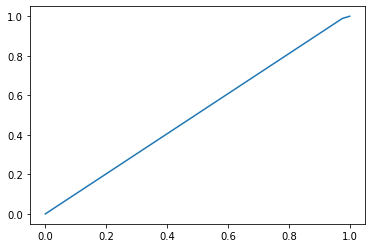

In [ ]:
fpr , tpr , threshold = roc_curve(y_test , y_pred)
print("AUC = " , auc(fpr , tpr))
plt.plot(fpr , tpr)

In [ ]:
y_val = y_test

## DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
dtpred = dt.predict(x_test)
dtpred

array([1., 0., 1., ..., 1., 1., 1.])

In [ ]:
dt_accuracy = accuracy_score(y_test, dtpred)
print("Accuracy =", dt_accuracy)

Accuracy = 0.7381720655407954


In [ ]:
accuracies = []
f1s = []
depths = []

for depth in range(3, 11):

  depths.append(depth)
  dt = DecisionTreeClassifier(random_state=0, max_depth=depth)
  dt.fit(x_train, y_train)
  pred = dt.predict(x_test)
  accuracies.append(accuracy_score(y_test, pred))
  f1s.append(f1_score(y_test, pred))


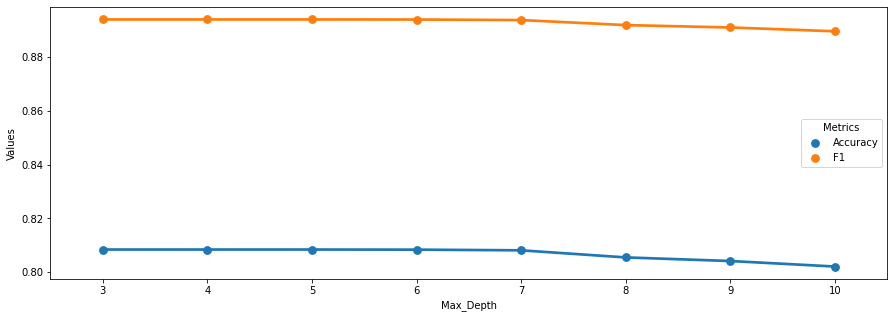

In [ ]:
tune_max_depth = {'Accuracy': accuracies, 'F1': f1s, 'Max_Depth': depths}
tune_max_depth_df = pd.DataFrame.from_dict(tune_max_depth)

plot_df = tune_max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [ ]:
print(accuracies, max(accuracies))
print(f1s, max(f1s))

[0.8084482252860077, 0.8084482252860077, 0.8084482252860077, 0.8084063194066128, 0.8081548841302435, 0.8055148137283661, 0.80417382558773, 0.8021204374973809] 0.8084482252860077
[0.8940794809407948, 0.8940794809407948, 0.8940794809407948, 0.8940538536404504, 0.8938508625486923, 0.8919768172613644, 0.8910900319295221, 0.8896728971962616] 0.8940794809407948


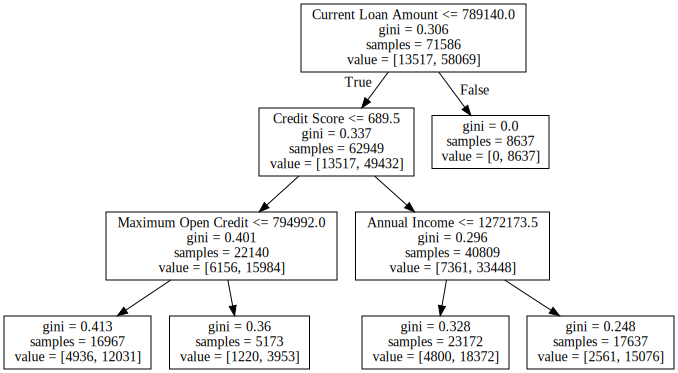

In [ ]:
import graphviz 

dt = DecisionTreeClassifier(random_state=0, max_depth=3)
dt.fit(x_train, y_train)
dot_data = export_graphviz(dt, feature_names = x_train.columns.tolist())
graph = graphviz.Source(dot_data)
graph

In [ ]:
dtpred = dt.predict(x_test)
dtpred

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
dt_accuracy = accuracy_score(y_val, dtpred)
dt_f1 = f1_score(y_val, dtpred)
dt_precision = precision_score(y_val, dtpred)
dt_recall = recall_score(y_val, dtpred)
print('Accuracy =', dt_accuracy)
print('F1 Score =', dt_f1)
print("Precision =", dt_precision)
print("Recall =", dt_recall)

Accuracy = 0.8084482252860077
F1 Score = 0.8940794809407948
Precision = 0.8084482252860077
Recall = 1.0


AUC= 0.5


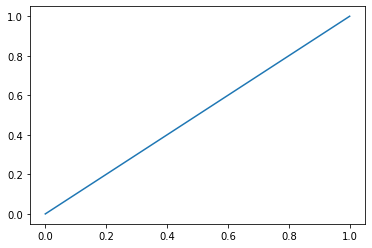

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, dtpred)
print('AUC=', auc(fpr, tpr))
plt.plot(fpr, tpr)

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=0, max_depth=10)
rf.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
rfpred = rf.predict(x_test)
rfpred

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
rf_accuracy = accuracy_score(y_test, rfpred)
rf_f1 = f1_score(y_test, rfpred)
rf_precision = precision_score(y_test, rfpred)
rf_recall = recall_score(y_test, rfpred)
print('Accuracy =', rf_accuracy)
print('F1 Score =', rf_f1)
print("Precision =", rf_precision)
print("Recall =", rf_recall)

Accuracy = 0.8085739429241923
F1 Score = 0.8941416388579904
Precision = 0.8085498742665549
Recall = 1.0


AUC = 0.5003281557646029


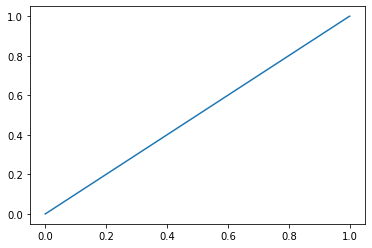

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, rfpred)
print('AUC =',auc(fpr, tpr))
plt.plot(fpr, tpr)

In [ ]:
print(score, knn_accuracy, dt_accuracy, rf_accuracy)

0.8111641941161679 0.8040481079495453 0.8084482252860077 0.8085739429241923


In [ ]:
all_accuracies = [score, knn_accuracy, dt_accuracy, rf_accuracy]
models = ['LogisticRegression', "KNearestNeighbor", "DecisionTreeClassifier", "RandomForestClassifier"]
print(all_accuracies);print(models)

[0.8111641941161679, 0.8040481079495453, 0.8084482252860077, 0.8085739429241923]
['LogisticRegression', 'KNearestNeighbor', 'DecisionTreeClassifier', 'RandomForestClassifier']


In [ ]:
acc_df = pd.DataFrame.from_dict({'Model': models, 'Accuracy': all_accuracies})

plot_acc_df = acc_df.melt('Model', var_name='Accuracies', value_name='Values')
plot_acc_df

,Model,Accuracies,Values
0,LogisticRegression,Accuracy,0.811164
1,KNearestNeighbor,Accuracy,0.804048
2,DecisionTreeClassifier,Accuracy,0.808448
3,RandomForestClassifier,Accuracy,0.808574


In [1]:
fig,ax = plt.subplots(figsize=(15,10))
sns.pointplot(x="Model", y="Values", data=plot_acc_df, ax=ax)

NameError: ignored